In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos2/datos_out_balanced.pkl").reset_index(drop=True)

## DECISION TREE

***Modelo A***

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 5, 6, 10, 15,20],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [1, 2, 3, 4,5,6]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=20, min_samples_split=4, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [4]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.94,1.00
test,0.76,0.75,0.76,0.76,0.21,0.60


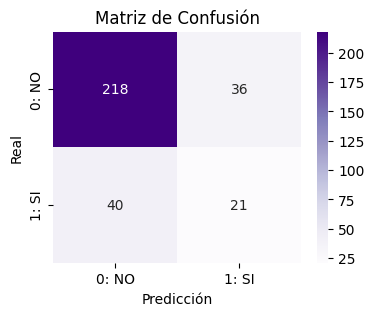

In [5]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

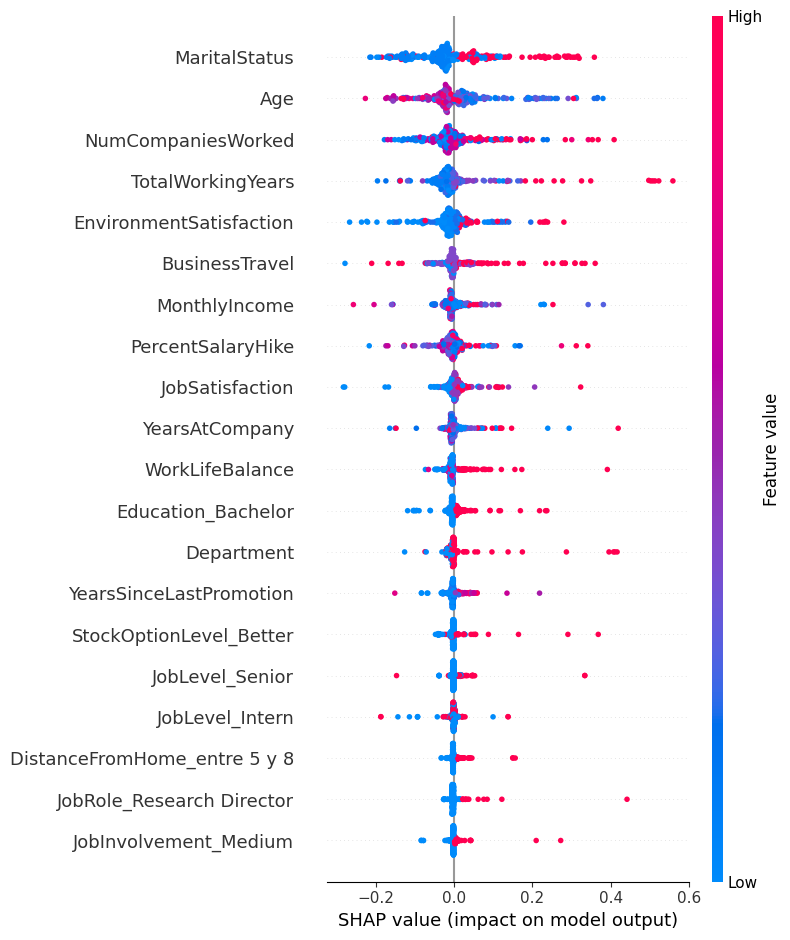

In [6]:
modelos_clasificacion.plot_shap_summary("tree")

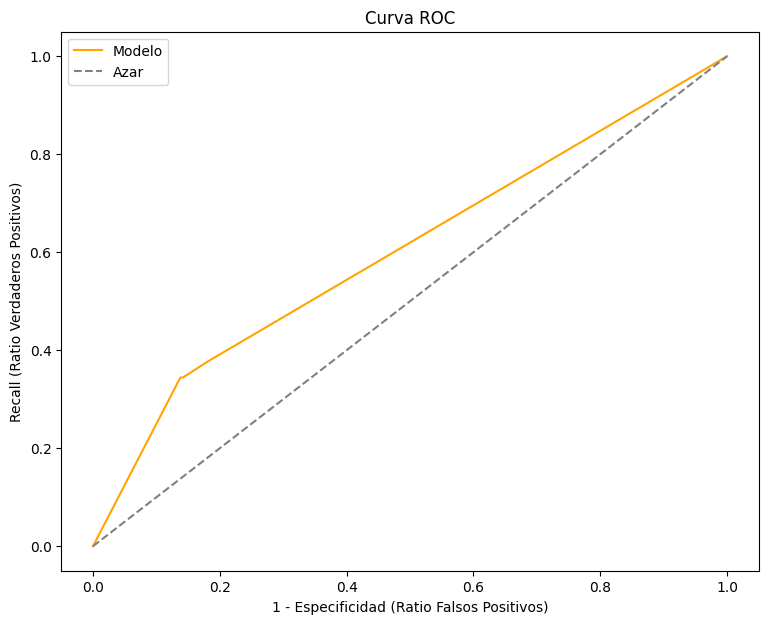

In [7]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

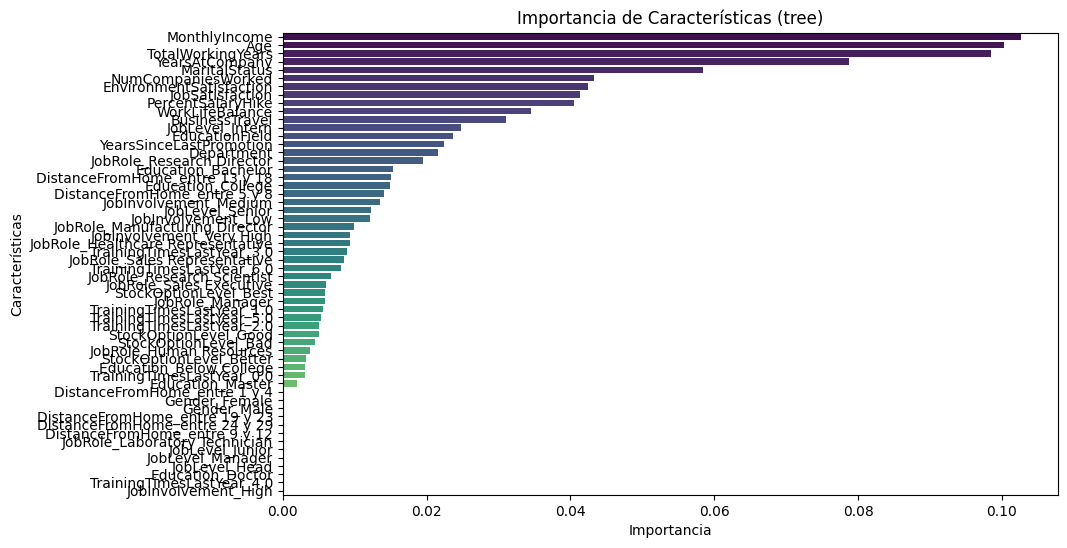

In [8]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo A.7***

In [9]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 5, 6, 10, 15,20],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [1, 2, 3, 4,5,6]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2.0.7.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_split=4, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [10]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.92,1.00
test,0.77,0.76,0.77,0.77,0.15,0.61


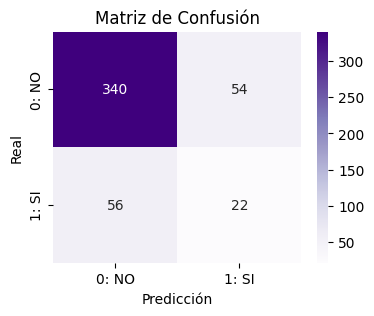

In [11]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

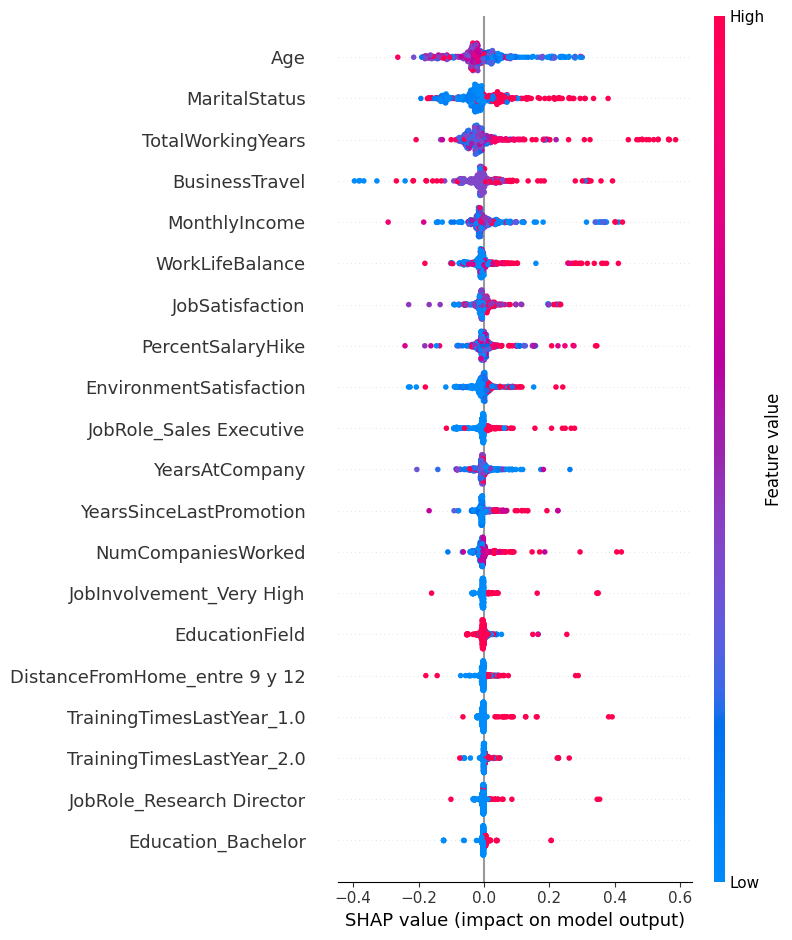

In [12]:
modelos_clasificacion.plot_shap_summary("tree")

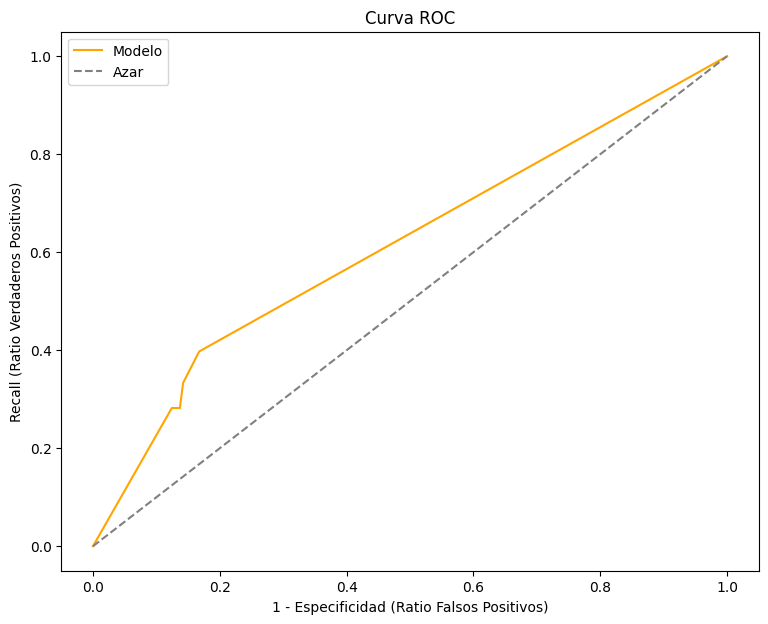

In [13]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

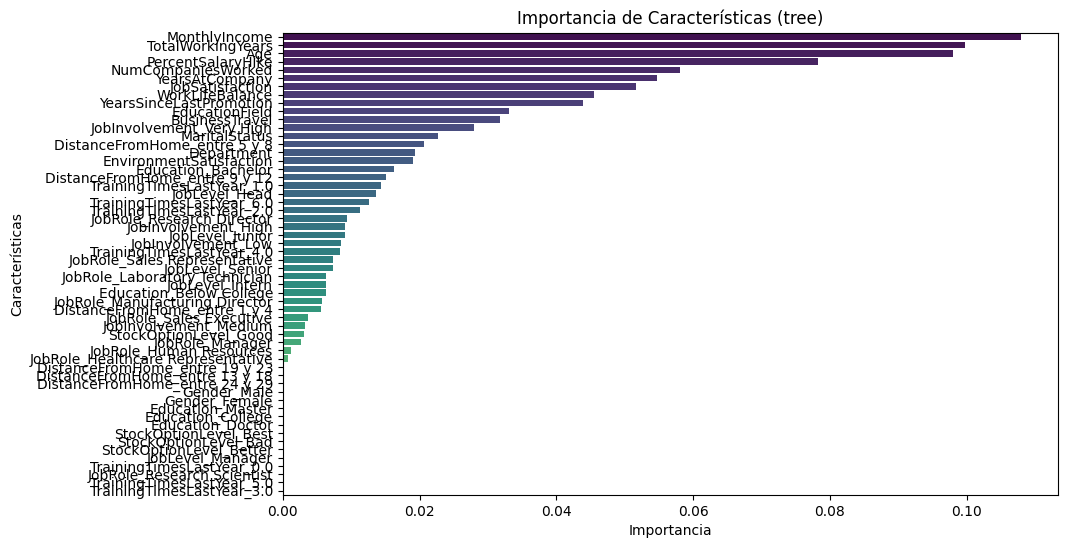

In [14]:
modelos_clasificacion.importancia_predictores("tree")

### TOCANDO PARAMETROS

## DECISION TREE

***Modelo B***

In [15]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 15,17,20,30,40],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2prueba.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [16]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.91,0.91,0.91,0.91,0.65,0.96
test,0.76,0.74,0.76,0.75,0.18,0.64


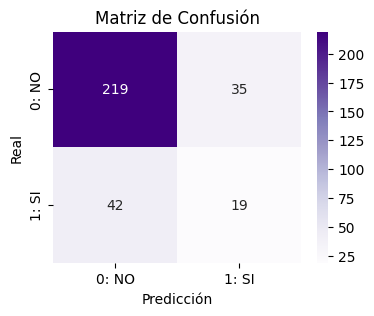

In [17]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

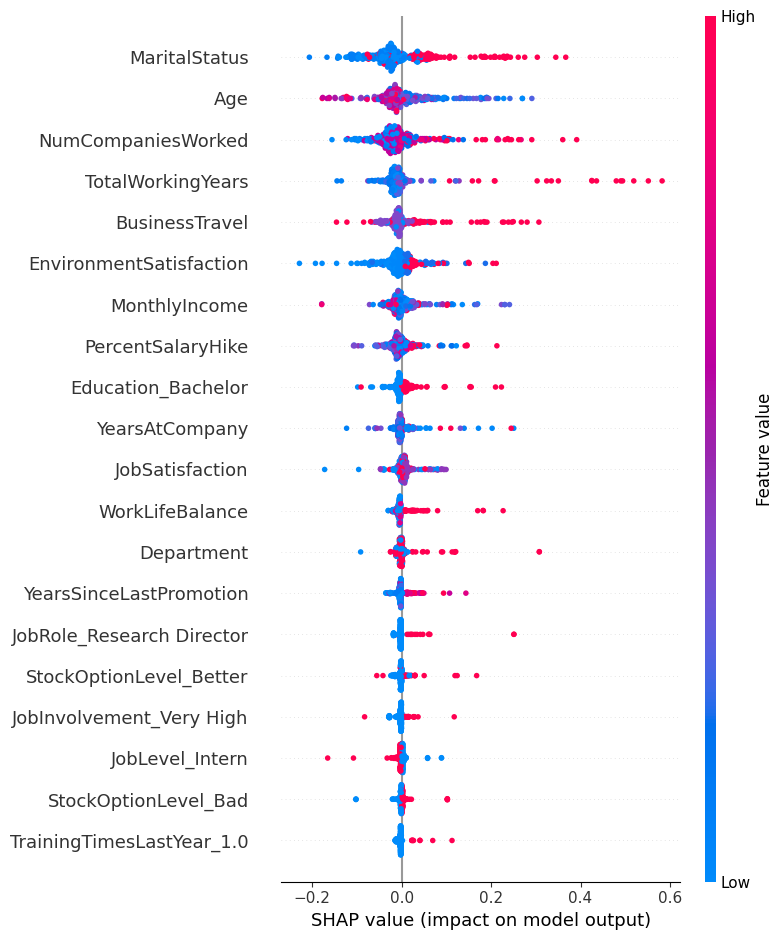

In [18]:
modelos_clasificacion.plot_shap_summary("tree")

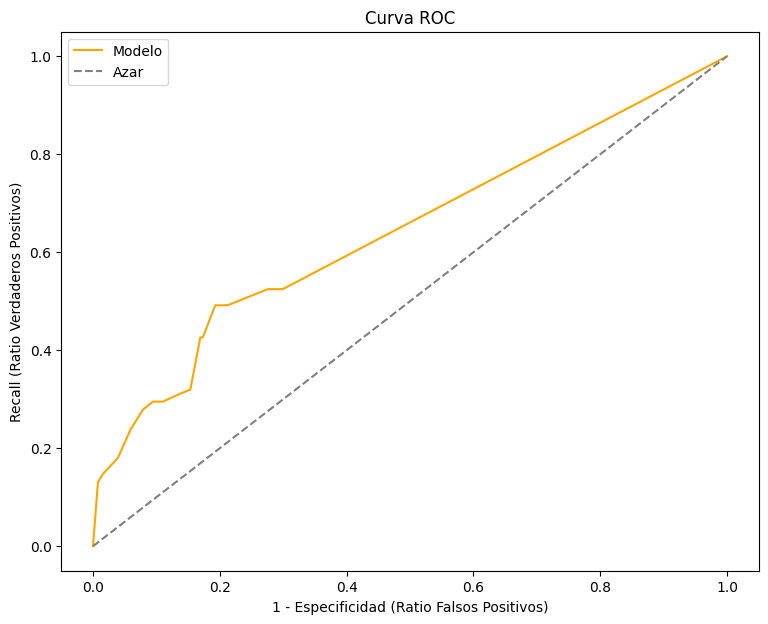

In [19]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

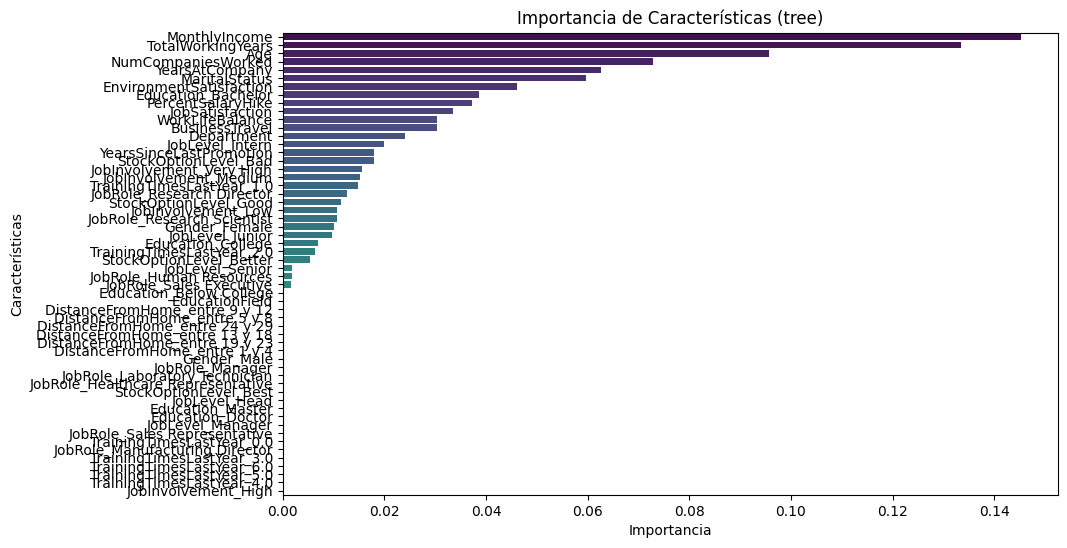

In [20]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo B.7***

In [21]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 15,17,20,30,40],'min_samples_split': [4,5,10,20,30, 40],'min_samples_leaf': [4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2",nombre_modelo_guardar="modelo_tree2.B.7prueba.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [22]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.88,0.86,0.88,0.86,0.43,0.92
test,0.82,0.79,0.82,0.80,0.20,0.66


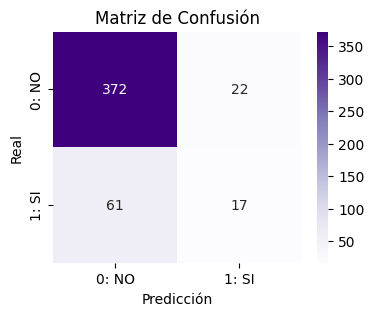

In [23]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

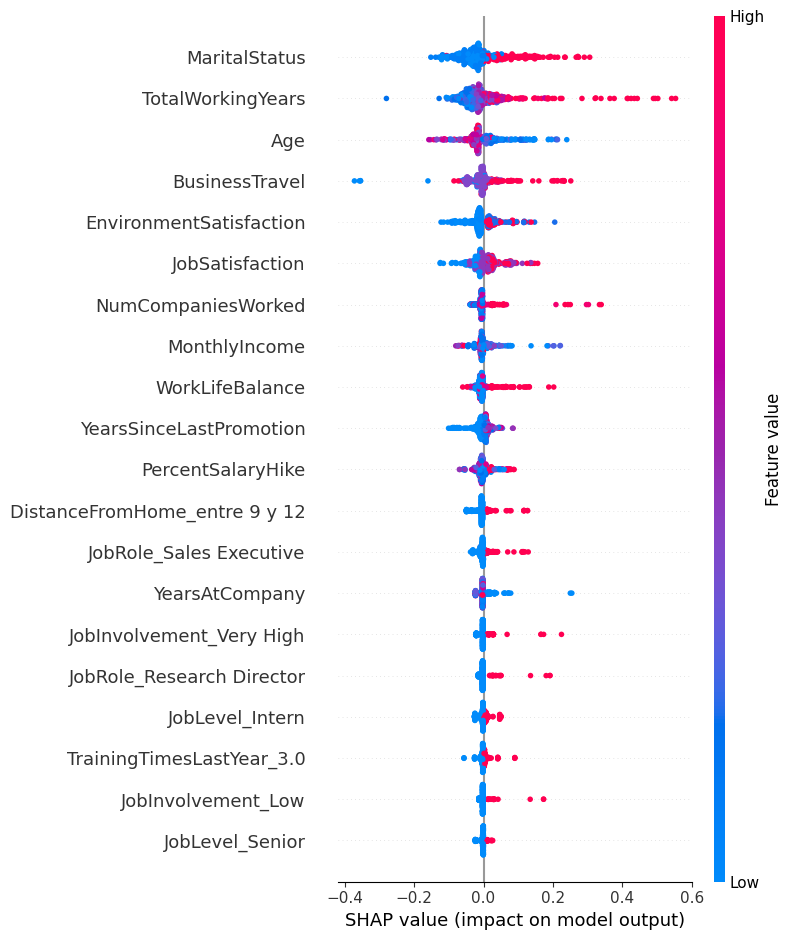

In [24]:
modelos_clasificacion.plot_shap_summary("tree")

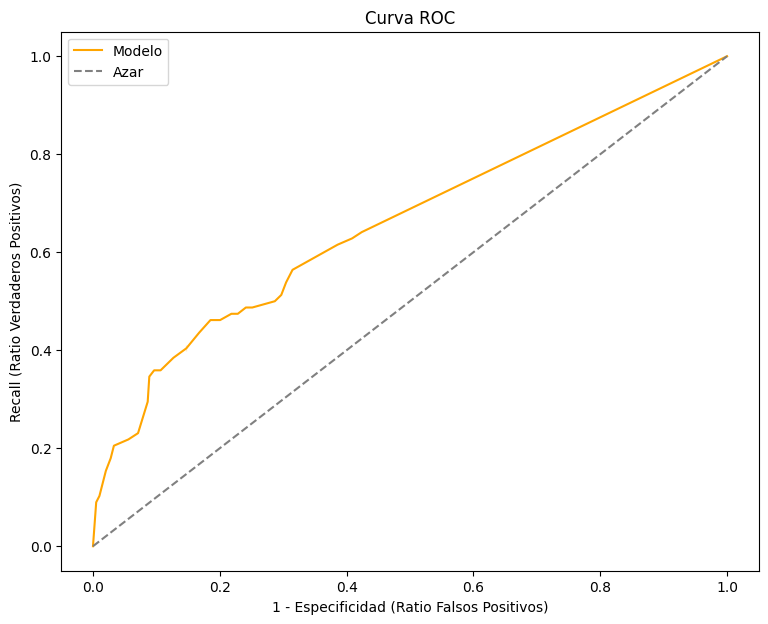

In [25]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

### TOCANDO PARAMETROS2

## DECISION TREE

***Modelo C***

In [26]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [4,5,7,10,20,30, 40],'min_samples_leaf': [3,4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2prueba2.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [27]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.95,0.95,0.94,0.78,0.99
test,0.80,0.78,0.80,0.79,0.29,0.67


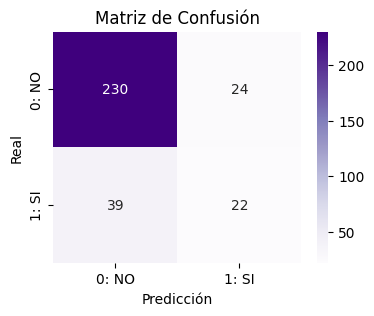

In [28]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

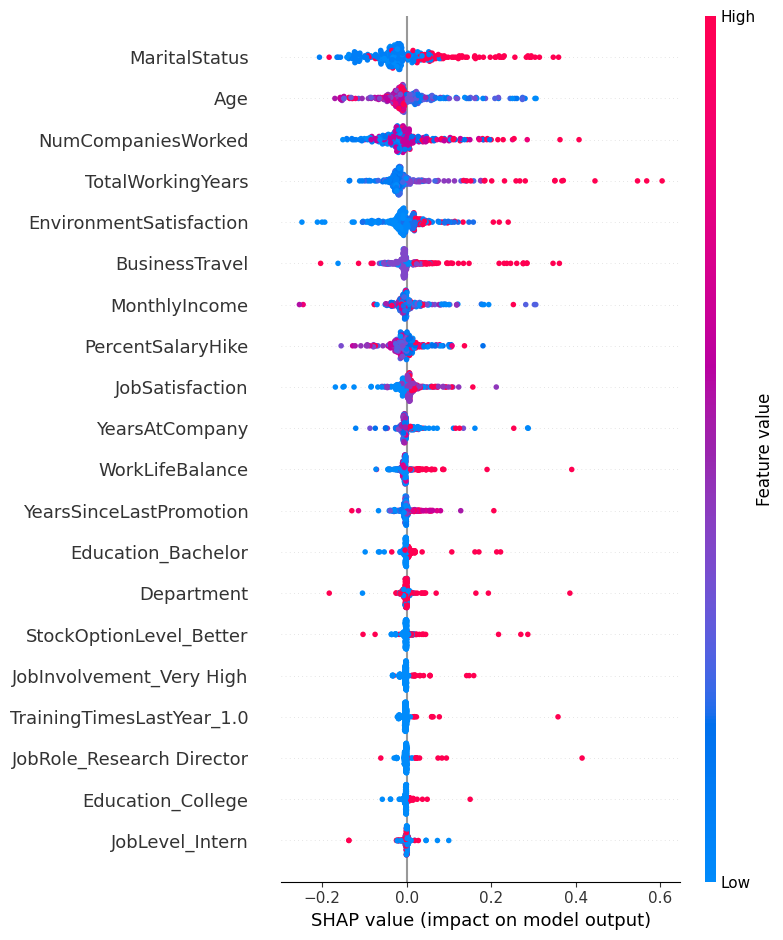

In [29]:
modelos_clasificacion.plot_shap_summary("tree")

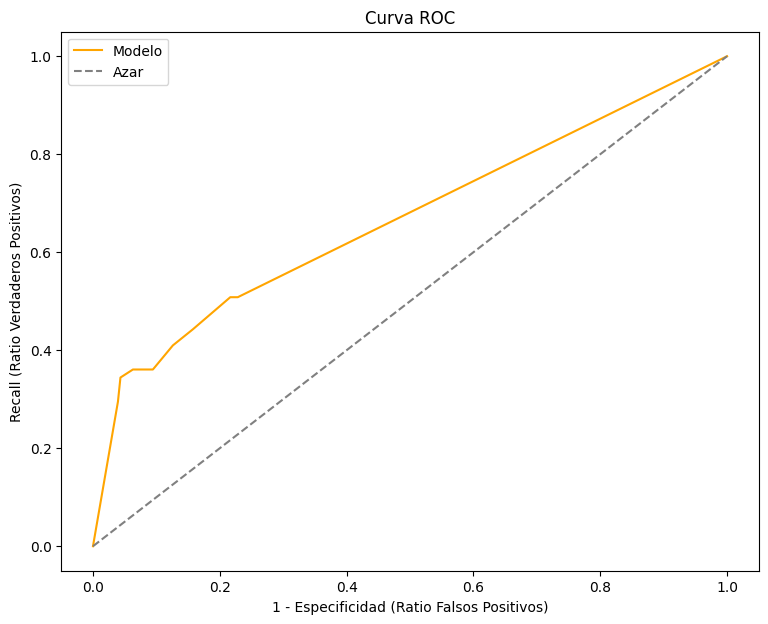

In [30]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

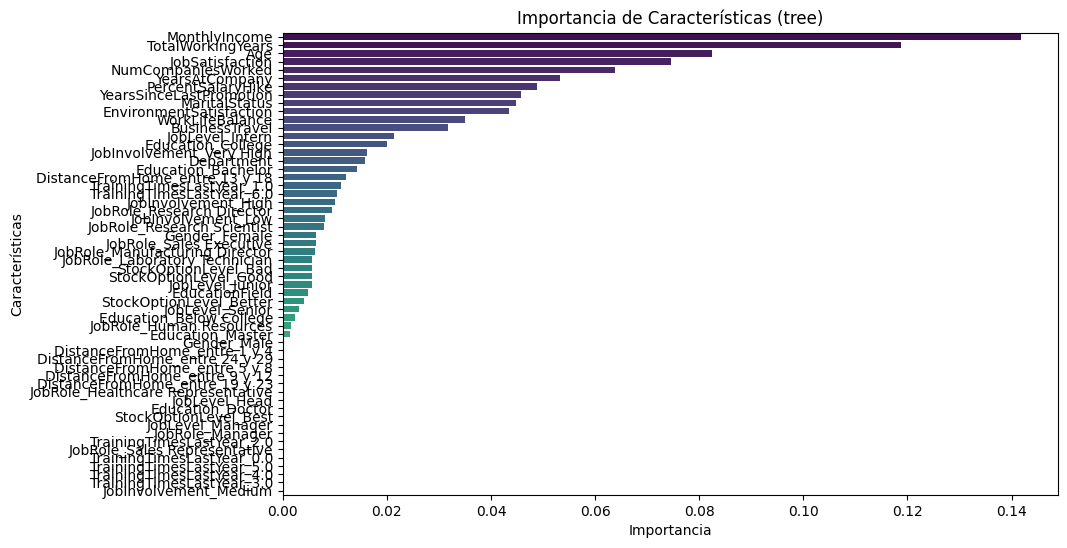

In [31]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo C.7***

In [32]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [4,5,7,10,20,30, 40],'min_samples_leaf': [3,4,5,6,10,20]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2.0.7prueba2.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=4,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [33]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.94,0.95,0.95,0.79,0.99
test,0.75,0.76,0.75,0.76,0.14,0.60


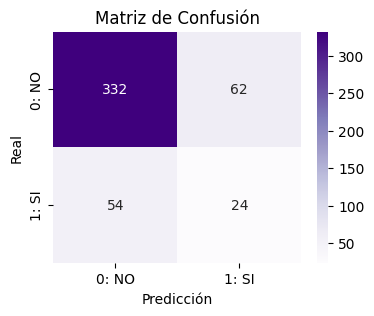

In [34]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

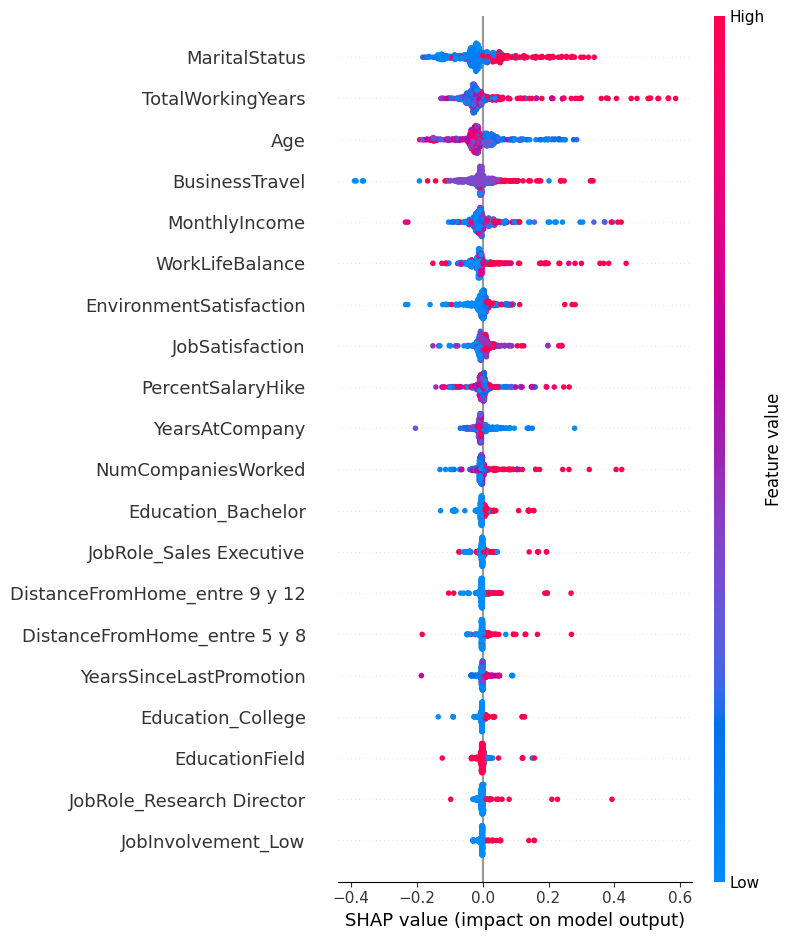

In [35]:
modelos_clasificacion.plot_shap_summary("tree")

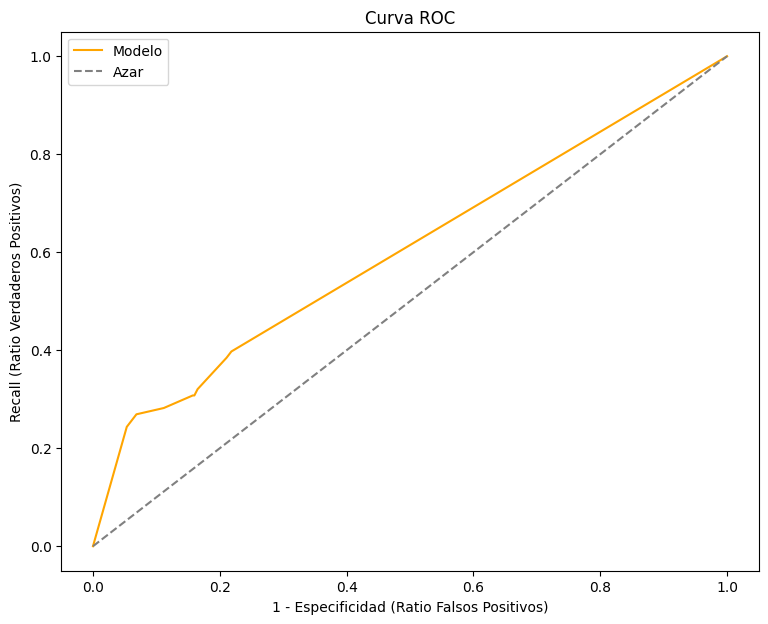

In [36]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

### TOCANDO PARAMETROS3

## DECISION TREE

***Modelo D***

In [37]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [3,4,5,7,10,20,30, 40],'min_samples_leaf': [2,3,4,5,6,10,20,40]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2prueba3.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=7,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [38]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.94,0.94,0.94,0.94,0.74,0.98
test,0.80,0.78,0.80,0.79,0.30,0.66


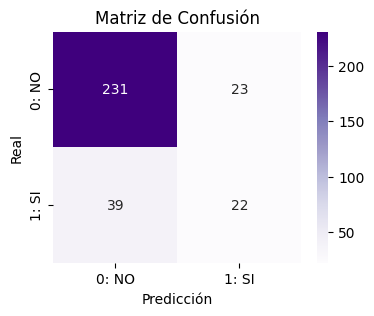

In [39]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

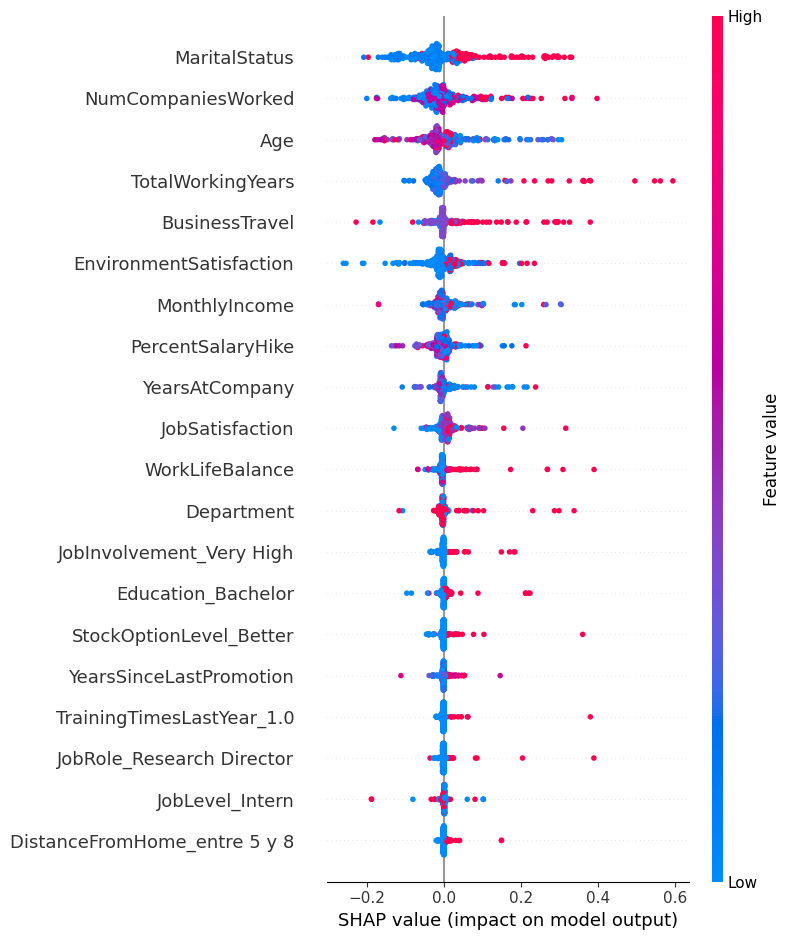

In [40]:
modelos_clasificacion.plot_shap_summary("tree")

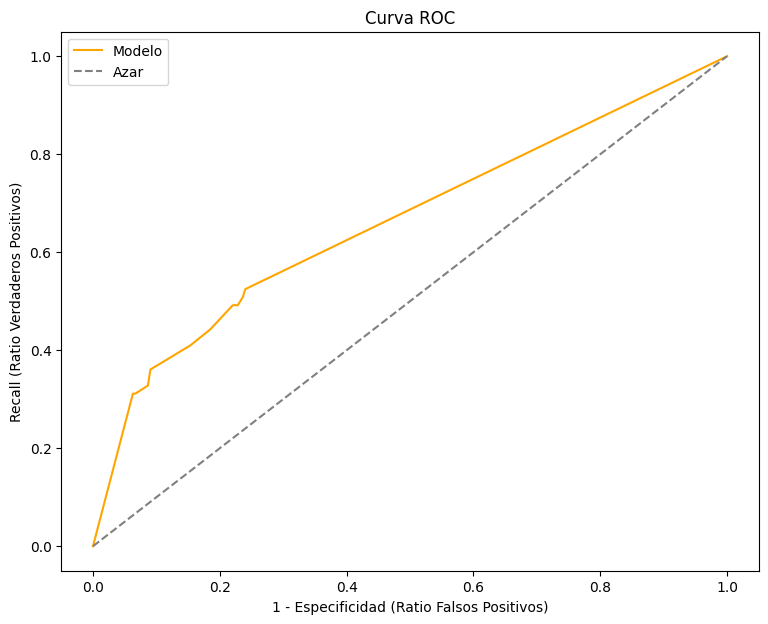

In [41]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

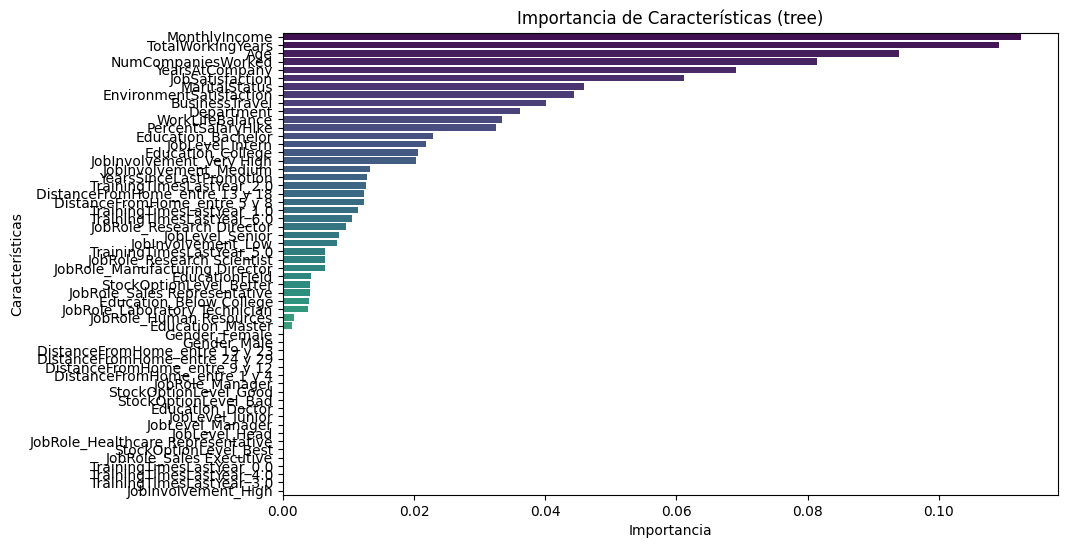

In [42]:
modelos_clasificacion.importancia_predictores("tree")

#### CON 0.7

***Modelo D.7***

In [43]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("tree", param_grid={'max_depth': [ 13,15,17,20,30,40],'min_samples_split': [3,4,5,7,10,20,30, 40],'min_samples_leaf': [2,3,4,5,6,10,20,40]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos2/basura",nombre_modelo_guardar="modelo_tree2.0.7prueba3.pkl")

-------------------------------------------------
El mejor modelo es:
DecisionTreeClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [44]:
modelos_clasificacion.calcular_metricas(modelo_nombre="tree").T

,accuracy,precision,recall,f1,kappa,auc
train,0.97,0.97,0.97,0.96,0.86,1.00
test,0.78,0.77,0.78,0.78,0.18,0.62


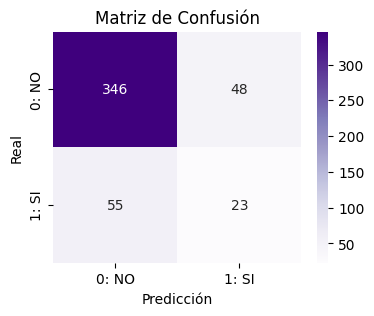

In [45]:
modelos_clasificacion.plot_matriz_confusion("tree", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

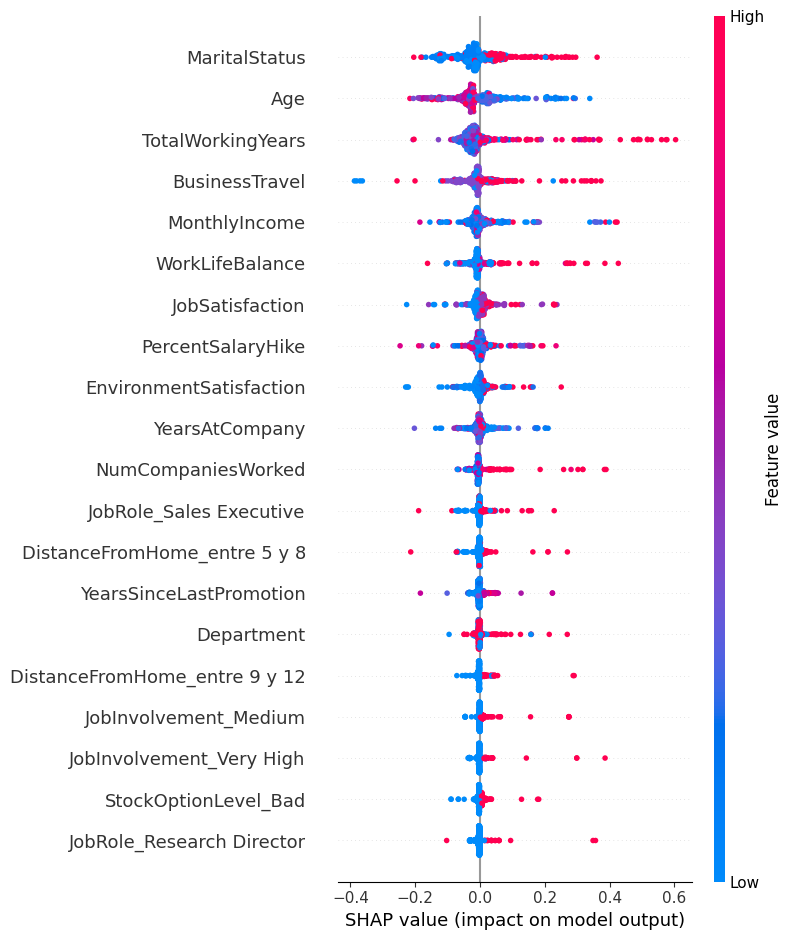

In [46]:
modelos_clasificacion.plot_shap_summary("tree")

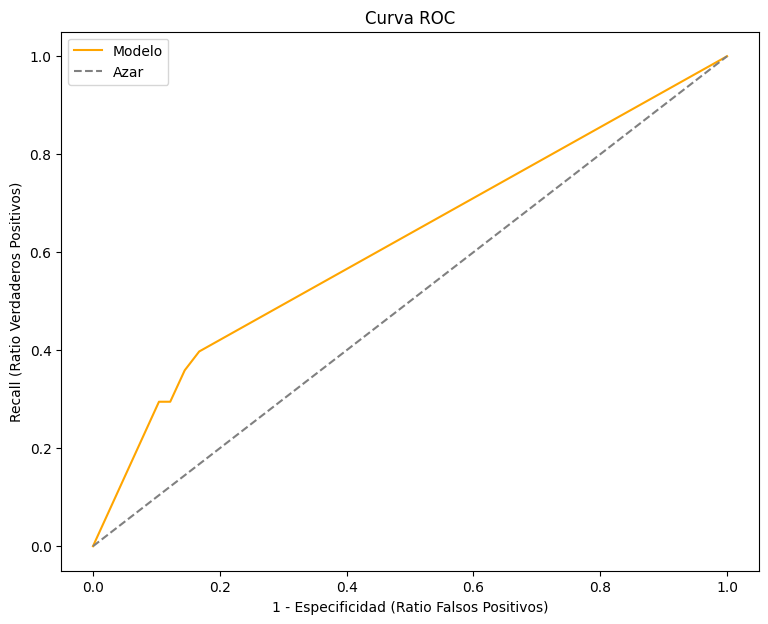

In [47]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

### Conclusion de mejor Decision tree:  
- Todos los que cuentan con 0.7 son peores por un gran Over fitting por lo general
  

*Tras observar todas las métricas de los modelos me cuestiono si usar el modelo D o el modelo B.7*       
  
**Primera opción (equilibrio general): Modelo B.7**  

Tiene menor overfitting, Recall más alto en test y unas métricas equilibradas.
Y aunque sacrifica un poco en Kappa, sigue siendo robusto teniendo en cuenta el resto.

**Segunda opción (si quiero priorizar Kappa): Modelo D**

#### ***Bajo mi criterio, prefiero el modelo B.7***  
